# Data Exploration

Now that we have clean data to work with, let's get some visualizations. 

In [2]:
import pandas as pd #Dataframe, Series
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns


from scipy import misc

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
#Read in data from collection and cleaning
df = pd.read_csv('clean_data3.csv')

In [4]:
#Get rid of unecessay first column
df = df.drop(columns='Unnamed: 0')

In [5]:
trainingData = df

In [6]:
#Color pallette for graphs
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [7]:
#Make an indivudal DataFrame for each feature/emotion.
h_tempo = trainingData[trainingData['Sad/Happy'] == 'H']['tempo']
s_tempo = trainingData[trainingData['Sad/Happy'] == 'S']['tempo']
h_dance = trainingData[trainingData['Sad/Happy'] == 'H']['danceability']
s_dance = trainingData[trainingData['Sad/Happy'] == 'S']['danceability']
h_duration = trainingData[trainingData['Sad/Happy'] == 'H']['duration_ms']
s_duration = trainingData[trainingData['Sad/Happy'] == 'S']['duration_ms']
h_loudness = trainingData[trainingData['Sad/Happy'] == 'H']['loudness']
s_loudness = trainingData[trainingData['Sad/Happy'] == 'S']['loudness']
h_speechiness = trainingData[trainingData['Sad/Happy'] == 'H']['speechiness']
s_speechiness = trainingData[trainingData['Sad/Happy'] == 'S']['speechiness']
h_valence = trainingData[trainingData['Sad/Happy'] == 'H']['valence']
s_valence = trainingData[trainingData['Sad/Happy'] == 'S']['valence']
h_energy = trainingData[trainingData['Sad/Happy'] == 'H']['energy']
s_energy = trainingData[trainingData['Sad/Happy'] == 'S']['energy']
h_acousticness = trainingData[trainingData['Sad/Happy'] == 'H']['acousticness']
s_acousticness = trainingData[trainingData['Sad/Happy'] == 'S']['acousticness']
h_key = trainingData[trainingData['Sad/Happy'] == 'H']['key']
s_key = trainingData[trainingData['Sad/Happy'] == 'S']['key']
h_instrumentalness = trainingData[trainingData['Sad/Happy'] == 'H']['instrumentalness']
s_instrumentalness = trainingData[trainingData['Sad/Happy'] == 'S']['instrumentalness']
h_popularity = trainingData[trainingData['Sad/Happy'] == 'H']['popularity']
s_popularity = trainingData[trainingData['Sad/Happy'] == 'S']['popularity']

# Graphs

Let's first take a look at how the tempo of song compares between Sad and Happy. Note that blue represents Sad.

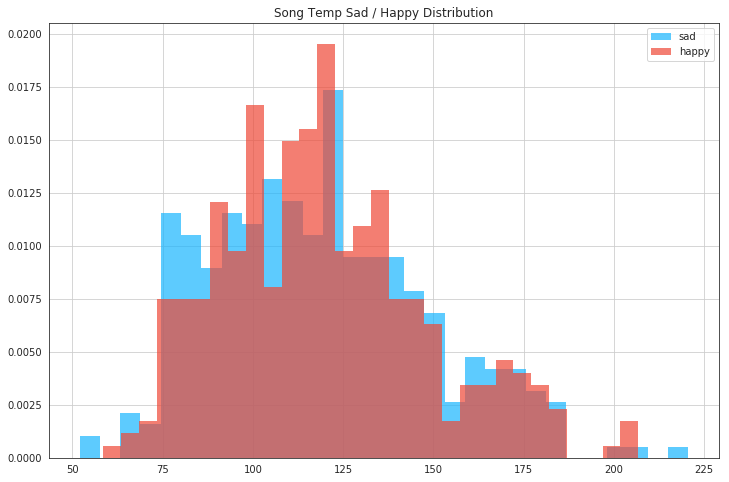

In [8]:
plt.rcParams["patch.force_edgecolor"] = False
fig = plt.figure(figsize=(12,8))
plt.title('Song Temp Sad / Happy Distribution')
s_tempo.hist(alpha=0.7, bins=30, label ='sad', density =True)
h_tempo.hist(alpha=0.7, bins=30, label ='happy', density=True)
plt.legend(loc='upper right')
plt.savefig("fig1.png")

We can see from the distribution above, that tempo might not be the best predictor of whether a song is Happy or Sad. Let's graph the rest!

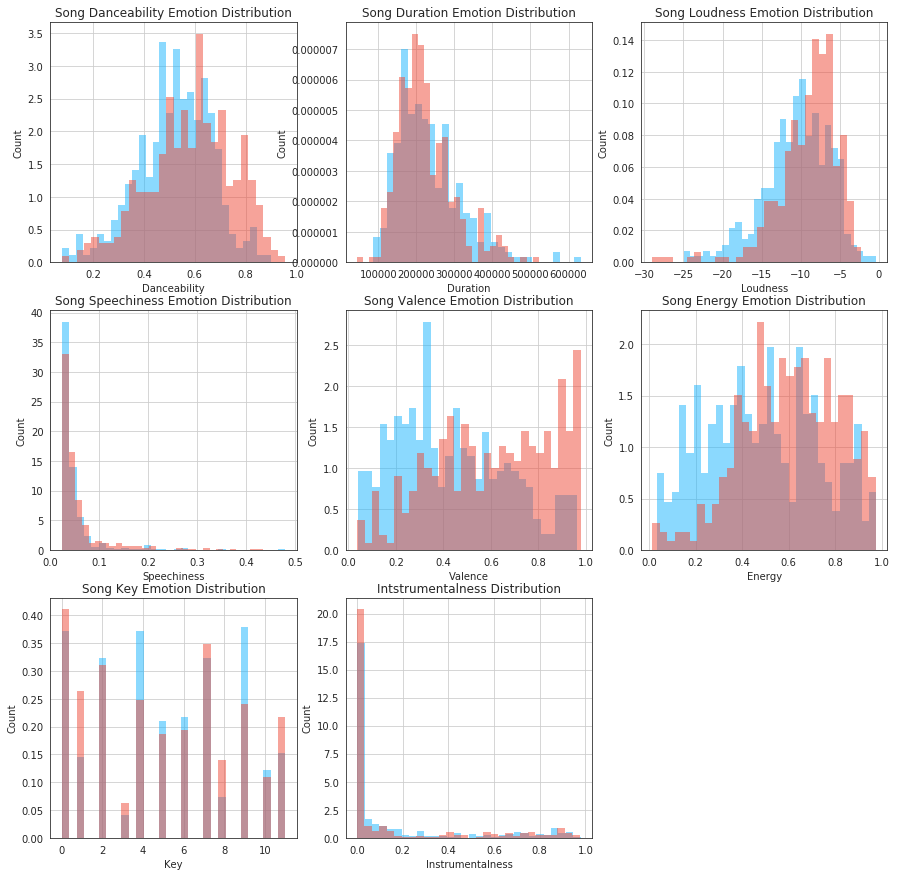

In [9]:
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Emotion Distribution')
s_dance.hist(alpha= 0.5, bins=30, density=True)
ax4 = fig2.add_subplot(331)
h_dance.hist(alpha= 0.5, bins=30, density=True)

#Duration_ms
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Emotion Distribution')
s_duration.hist(alpha= 0.5, bins=30, density=True)
ax6 = fig2.add_subplot(332)
h_duration.hist(alpha= 0.5, bins=30, density=True)

#Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Emotion Distribution')
s_loudness.hist(alpha= 0.5, bins=30, density=True)
ax8 = fig2.add_subplot(333)
h_loudness.hist(alpha= 0.5, bins=30, density=True)

#Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Emotion Distribution')
s_speechiness.hist(alpha= 0.5, bins=30, density=True)
ax10 = fig2.add_subplot(334)
h_speechiness.hist(alpha= 0.5, bins=30, density=True)

#Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Emotion Distribution')
s_valence.hist(alpha= 0.5, bins=30, density=True)
ax12 = fig2.add_subplot(335)
h_valence.hist(alpha= 0.5, bins=30, density=True)

#Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Emotion Distribution')
s_energy.hist(alpha= 0.5, bins=30, density=True)
ax14 = fig2.add_subplot(336)
h_energy.hist(alpha= 0.5, bins=30, density=True)

#Key
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Emotion Distribution')
s_key.hist(alpha= 0.5, bins=30, density=True)
ax16 = fig2.add_subplot(337)
h_key.hist(alpha= 0.5, bins=30, density=True)

#Instrumentalness
ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title('Intstrumentalness Distribution')
s_instrumentalness.hist(alpha= 0.5, bins=30, density=True)
ax18 = fig2.add_subplot(338)
h_instrumentalness.hist(alpha= 0.5, bins=30, density=True)
fig2.savefig("fig2.png")

Initially we might notice a few important graphs. For example, valence gives us a nice distinction between happy and sad songs. Energy, Loudness, and Danceability are among others that stand out. Let's take a closer look at the graph for Valence. 

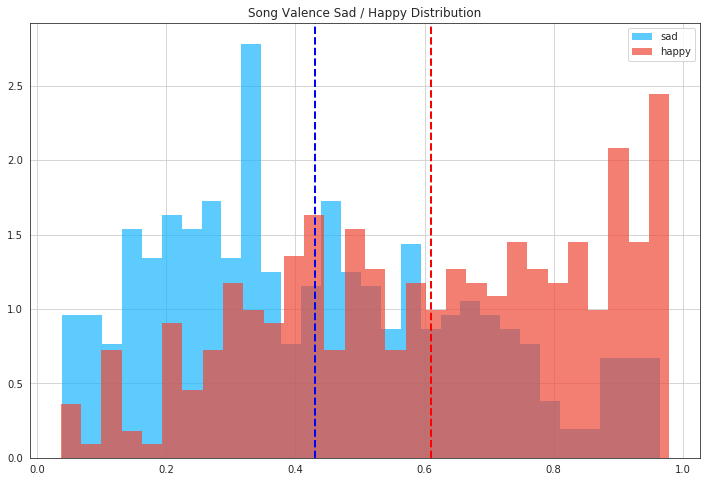

In [10]:
plt.rcParams["patch.force_edgecolor"] = False
fig = plt.figure(figsize=(12,8))
plt.title('Song Valence Sad / Happy Distribution')
s_valence.hist(alpha=0.7, bins=30, label ='sad', density =True)
h_valence.hist(alpha=0.7, bins=30, label ='happy', density=True)
plt.legend(loc='upper right')
plt.axvline(s_valence.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(h_valence.mean(), color='red', linestyle='dashed', linewidth=2)
plt.savefig("fig10.png")

Notice there is a significant difference in means between the two histograms. But what exactly does Valence tell us?

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).”


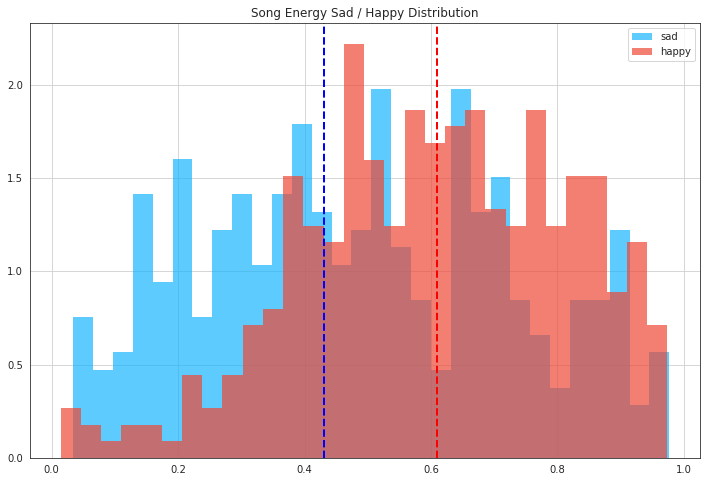

In [11]:
plt.rcParams["patch.force_edgecolor"] = False
fig = plt.figure(figsize=(12,8))
plt.title('Song Energy Sad / Happy Distribution')
s_energy.hist(alpha=0.7, bins=30, label ='sad', density =True)
h_energy.hist(alpha=0.7, bins=30, label ='happy', density=True)
plt.legend(loc='upper right')
plt.axvline(s_valence.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(h_valence.mean(), color='red', linestyle='dashed', linewidth=2)
plt.savefig("fig11.png")

Energy also seems to give a nice distinction between Sad and Happy. This suggests that Energy might be a good predictor of whether or not a song feels happy. Let's see how energy is measured.

**Energy** is a measure from 0.0 to 1.0 and represents a perceptual measure of *intensity* and *activity*. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has *high* energy, while a Bach prelude scores *low* on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

# User Specific Data

This is for all of the songs in our data set. What happens if we just look at a specific user? Will the graphs be different? For example, let's consider songs only submitted by Valen. I am choosing Valen because they have the most individual data of 199 songs. 

In [12]:
valen_df = df[df["Name"]=="Valen"]
emily_df = df[df["Name"]=="Emily"]
valen_df.head()

,Name,Title,Artist,Sad/Happy,parent,album,artists,available_markets,disc_number,duration_ms,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,time_signature
166,Valen,Me and My Arrow,Harry Nilsson,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,125667,...,1,0.0340,0.6580,0.002850,0.1420,0.962,91.568,https://api.spotify.com/v1/tracks/5KjRITicSHJM...,https://api.spotify.com/v1/audio-analysis/5KjR...,4
167,Valen,The Lovely Linda,Paul McCartney,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",1,44413,...,1,0.0325,0.3230,0.011300,0.2400,0.928,119.241,https://api.spotify.com/v1/tracks/1aytqbFoJrHf...,https://api.spotify.com/v1/audio-analysis/1ayt...,4
168,Valen,Got To Get You into My Life,The Beatles,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,149240,...,1,0.0302,0.4200,0.000009,0.0838,0.711,136.679,https://api.spotify.com/v1/tracks/3tGhRLgcCP6S...,https://api.spotify.com/v1/audio-analysis/3tGh...,4
169,Valen,Back Pocket,Vulfpeck,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,181260,...,1,0.1530,0.4780,0.002810,0.0435,0.890,89.821,https://api.spotify.com/v1/tracks/1DrlLvlYd1FI...,https://api.spotify.com/v1/audio-analysis/1Drl...,4
170,Valen,Cory Wong,Vulfpeck,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,246910,...,1,0.1380,0.0894,0.571000,0.8130,0.959,127.508,https://api.spotify.com/v1/tracks/1L9qsoNnyT3r...,https://api.spotify.com/v1/audio-analysis/1L9q...,4


In [13]:
v_h_loudness = valen_df[valen_df['Sad/Happy'] == 'H']['loudness']
v_s_loudness = valen_df[valen_df['Sad/Happy'] == 'S']['loudness']
e_h_loudness = emily_df[emily_df['Sad/Happy'] == 'H']['loudness']
e_s_loudness = emily_df[emily_df['Sad/Happy'] == 'S']['loudness']
h_valence = trainingData[trainingData['Sad/Happy'] == 'H']['valence']
s_valence = trainingData[trainingData['Sad/Happy'] == 'S']['valence']

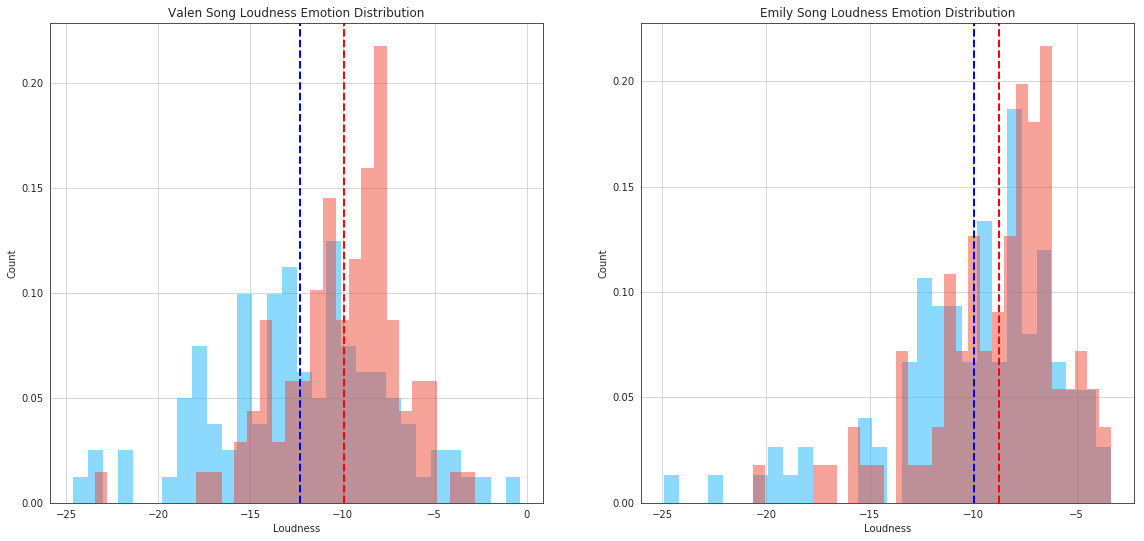

In [14]:
fig2 = plt.figure(figsize=(30,30))
#Loudness
ax7 = fig2.add_subplot(331)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Valen Song Loudness Emotion Distribution')
v_s_loudness.hist(alpha= 0.5, bins=30, density=True)
ax8 = fig2.add_subplot(331)
v_h_loudness.hist(alpha= 0.5, bins=30, density=True)
plt.axvline(v_s_loudness.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(v_h_loudness.mean(), color='red', linestyle='dashed', linewidth=2)

ax9 = fig2.add_subplot(332)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Emily Song Loudness Emotion Distribution')
e_s_loudness.hist(alpha= 0.5, bins=30, density=True)
ax10 = fig2.add_subplot(332)
e_h_loudness.hist(alpha= 0.5, bins=30, density=True)
plt.axvline(e_s_loudness.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(e_h_loudness.mean(), color='red', linestyle='dashed', linewidth=2)
plt.savefig("fig9.png")

One thing to notice that we may not have considered before, is that Emily seems to listen to "louder" music than Valen. A model could take this into account when trying to determine the emotional sentiment for *that* user.

### Now that we have an idea of how are data is behaving, let's train some models!